In [2]:
import numpy as np
import seaborn as sb
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [3]:
data = pd.read_csv("D:\\Downloads\\50_Startups.csv")
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
#VIEW DATA SUMMARY
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB
None
           R&D Spend  Administration  Marketing Spend         Profit
count      50.000000       50.000000        50.000000      50.000000
mean    73721.615600   121344.639600    211025.097800  112012.639200
std     45902.256482    28017.802755    122290.310726   40306.180338
min         0.000000    51283.140000         0.000000   14681.400000
25%     39936.370000   103730.875000    129300.132500   90138.902500
50%     73051.080000   122699.795000    212716.240000  107978.190000
75%    101602.800000   144842.180000

<Axes: >

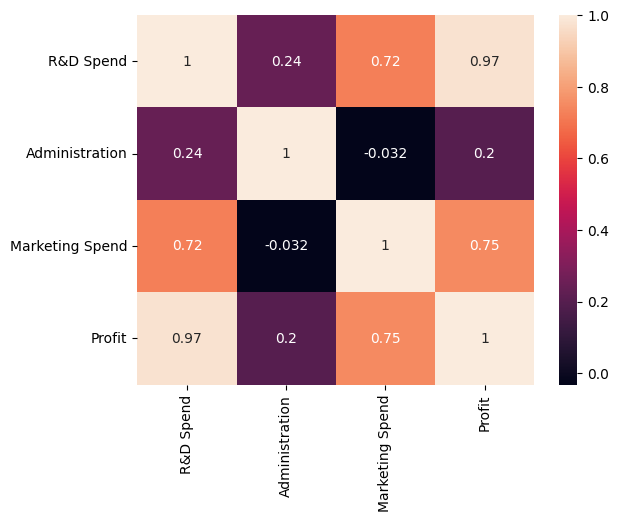

In [5]:
sb.heatmap(data.drop(['State'], axis = 1).corr(),annot = True) 

<Axes: >

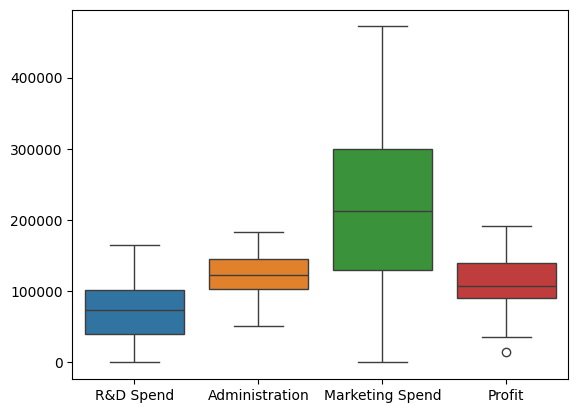

In [6]:
sb.boxplot(data)

In [7]:
#SPLIT DATA
x = data.drop(['Profit','State'],axis = 1)
y = data['Profit']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 45)

In [8]:
#TRAIN MODEL
model= LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [9]:
#PREDICT USING MODEL
pred = model.predict(x_test)

In [10]:
#EVALUATING MODEL
mse = mean_squared_error(y_test,pred)
print(mse)
score = r2_score(y_test,pred)
print(score)
mae = mean_absolute_error(y_test,pred)
print(mae)
rmse  = np.sqrt(mse)
print(rmse)

31230280.560231782
0.9836713364627709
4842.76563147151
5588.405905106732


In [ ]:
#predict using random val
val1 = float(input("Enter R&D Spend: "))
val2 = float(input("Enter Administration: "))
val3 = float(input("Enter Marketing Spend: "))
new_val = pd.DataFrame([[val1, val2, val3]], columns = ['R&D Spend', 'Administration', 'Marketing Spend'])

new_pred = model.predict(new_val)
print(new_pred)